In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley import ShapNN
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

In [2]:
train_df = pd.read_csv("Data/brunello_train_shapley.csv")
test_df = pd.read_csv("Data/brunello_test_shapley.csv")
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [3]:
print(train_df.shape)
print(test_df.shape)

(100, 6)
(2000, 6)


In [4]:
X, y = np.array(train_df.iloc[:,:-1]), np.array(train_df.iloc[:,-1])
X_test, y_test = np.array(test_df.iloc[:,:-1]), np.array(test_df.iloc[:,-1])
y = y.astype(int)
y_test = y_test.astype(int)

model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False)

  0%|          | 0/100 [00:00<?, ?it/s]

Starting LOO score calculations!
LOO values calculated!


100%|██████████| 100/100 [00:02<00:00, 47.78it/s]


In [5]:
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1,g_run=False)

  5%|▌         | 5/100 [00:00<00:02, 46.30it/s]

LOO values calculated!


100%|██████████| 100/100 [00:02<00:00, 47.63it/s]


In [6]:
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=2)
dshap.run(100, 0.1,g_run=False)

  5%|▌         | 5/100 [00:00<00:02, 46.04it/s]

LOO values calculated!


100%|██████████| 100/100 [00:02<00:00, 34.30it/s]


In [7]:
dshap.merge_results()

./temp/mem_tmc_0001.pkl
./temp/mem_tmc_0000.pkl
./temp/mem_tmc_0002.pkl
./temp/mem_g_0002.pkl
./temp/mem_g_0000.pkl
./temp/mem_g_0001.pkl


In [11]:
tmc_values = dshap.vals_tmc
loo_values = dshap.vals_loo

In [12]:
from scipy import stats

print(stats.describe(tmc_values))
print(stats.describe(loo_values))

DescribeResult(nobs=100, minmax=(-0.0006714285714285716, 0.0012257142857142835), mean=0.0001166928571428572, variance=1.783306499175429e-07, skewness=0.7827954960052909, kurtosis=-0.03917028701921543)
DescribeResult(nobs=100, minmax=(0.0, 0.0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)


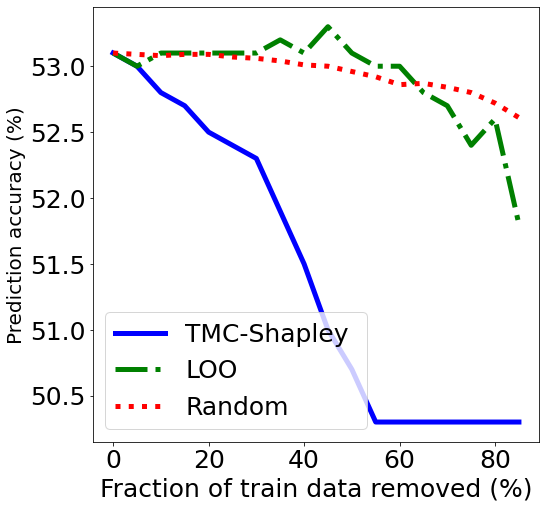

In [13]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

In [14]:
dshap.performance_plots2([dshap.vals_tmc, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

AttributeError: 'DShap' object has no attribute 'performance_plots2'